## Predicting Students' Dropout and Academic Success ###

## Introduction:

A key marker of academic success is usually whether a student graduates or drops out. That said, many factors come into play when determining the trajectory of a student's academic path.
For our project, we will use existing data to determine whether a student will graduate, dropout, or remain enrolled at the end of their course, given their grades.
In order to do this, we will be using a dataset from the UC Irvine Machine Learning Repository containing data on students enrolled in various undergraduate degrees.
The dataset, titled "Predict students' dropout and academic success," includes information on students' demographics, socio-economic conditions, and academic performance.
Each row represents observations on one student, and there is a total of 37 columns representing various data, one of which is the classification of students into "dropout," "enrolled," or "graduate". 
For the purpose of this project, we will be focusing on the columns pertaining to high school students' semester 1 and semester 2 grades, which we will use as predictors to predict the trajectory of their academic path (dropout or graduate).

## Methods & Results
We started by loading the dataset from a CSV file using read_delim(), specifying a semicolon delimiter with delim = ";". 
We used the clean_names function to make column names easier to code with, and converted the "Class" variable (target) into a factor, and ensured that the data is in tidy format with no missing data.
To extract the relevant data, we filtered the data and selected the columns: "target," "admission grade," "previous qualification grade," "curricular_unit_1st_sem_grade," and "curricular_units_2nd_sem_grade." For this project, we used semester 1 and 2 grades as predictors, since research suggests that academic performance has one of the biggest influences in a student's academic path (Dinh-Thanh & Thi-Ngoc-Diem, 2023). 


For the purpose of this project, we chose the K-nearest neighbors classification. We split the data into training and testing sets, and visualized the relationship between the target variable ("Target" column) and predictors ("Semester 1 grade and Semester 2 grad columns ), where the color of each point represents the predicted class (e.g., "Graduate" or "Dropout") using the training data. 

We analyzed the dataset to determine what additional steps to employ (shown in our code and comments below). We standardized and balanced the data to increase the accuracy of our model. Then, we found the ideal k value by invoking the recipe() function to specify the response variable ("Target") and predictor variables, and created the K-nearest value classifier. After that, our group utilized the vfold_cv function to further split the training data into cross-validation sets and create multiple classifiers to helps us to evaluate a better estimate of accuracy. 

Finally, we used cross-validation to calculate the accuracy for each value of  K in a reasonable range, and then pick the value of K that gives us the best accuracy. We created a line to visualize the estimated accuracy versus the number of neighbours. Our group found that the model’s accuracy estimate is arround 0.728 with k = 76.

In [1]:
# install all packages needed for the code
install.packages("themis")
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(tidymodels)
library(janitor)
options(repr.matrix.max.rows = 6)
library(themis)
library(cowplot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1    

### 1. Reading the data

In [3]:
url <- "https://raw.githubusercontent.com/PengggJosh/dsci100-group-project/main/data.csv"

dropout_data <- read_delim(url, delim=";")

print("1.1 Raw Data Table")
dropout_data

Rows: 4424 Columns: 37
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (1): Target
dbl (36): Marital status, Application mode, Application order, Course, Dayti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "1.1 Raw Data Table"


Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,⋯,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,17,5,171,1,1,122,1,19,12,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,15,1,9254,1,1,160,1,1,3,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
1,1,5,9070,1,1,122,1,37,37,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,1,1,9500,1,1,154,1,37,37,⋯,0,8,9,1,13.5,0,13.9,-0.3,0.79,Dropout
1,1,1,9147,1,1,180,1,37,37,⋯,0,5,6,5,12.0,0,9.4,-0.8,-3.12,Graduate
1,10,1,9773,1,1,152,22,38,37,⋯,0,6,6,6,13.0,0,12.7,3.7,-1.70,Graduate


### 2. Cleaning and wrangling data

In [4]:
#The data frame is already in tidy format, where each row is an observation, each column is an variable, and each cell is a value;
# so no wrangling needs to be done to the data

dropout_data <- dropout_data |>
#Changing the column names to be easier to work with and changing the Class variable (target in this case) as a factor
clean_names()|>
mutate(target = as_factor(target))|>

#get rid of any NA values
drop_na()
print("2.1 Clean Data Table")
dropout_data

[1] "2.1 Clean Data Table"


marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nacionality,mothers_qualification,fathers_qualification,⋯,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,17,5,171,1,1,122,1,19,12,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,15,1,9254,1,1,160,1,1,3,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
1,1,5,9070,1,1,122,1,37,37,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,1,1,9500,1,1,154,1,37,37,⋯,0,8,9,1,13.5,0,13.9,-0.3,0.79,Dropout
1,1,1,9147,1,1,180,1,37,37,⋯,0,5,6,5,12.0,0,9.4,-0.8,-3.12,Graduate
1,10,1,9773,1,1,152,22,38,37,⋯,0,6,6,6,13.0,0,12.7,3.7,-1.70,Graduate


### 3. Filtering and selecting the data relevant to our purpose

In [5]:
#Filter non-scholarship holders
only_grades <- dropout_data |>
filter(scholarship_holder == 0)|>

#Filter the non-high school students
filter(previous_qualification == 1)|>


#Remove grades that are equal to zero. The students that received zero on tests did not participate in tests,
# therefore they will not be included in the classification process
filter(curricular_units_1st_sem_grade != 0)|>
filter(curricular_units_2nd_sem_grade != 0)|>


#Scale grades to be out of 100 (Instead of being out of 20 in the data set) for easier interpretation and analysis
mutate(curricular_units_2nd_sem_grade = (curricular_units_2nd_sem_grade/20*100), curricular_units_1st_sem_grade = (curricular_units_1st_sem_grade/20*100))|>

#Select the predictors we will be working with and the Class variable
select(curricular_units_1st_sem_grade, curricular_units_2nd_sem_grade ,target)|>


#Convert the target column into a string and filter out "Enrolled", since we only want to predict the dropouts and graduates.
#Convert the filtered column into a factor with only 2 variables.
#If "Enrolled" is simply filtered out, when balancing later on, the program will not cause errors for not having any "Enrolled" observation to balance
mutate(target = as.character(target))|>
filter(target != "Enrolled")|>
mutate(target = as.factor(target))

print("3.1 Filtered Data Table")
only_grades

[1] "3.1 Filtered Data Table"


curricular_units_1st_sem_grade,curricular_units_2nd_sem_grade,target
<dbl>,<dbl>,<fct>
70.00000,68.33333,Graduate
67.14286,62.00000,Graduate
61.66667,65.00000,Graduate
⋮,⋮,⋮
68.00000,63.33333,Graduate
60.00000,55.00000,Dropout
58.33333,65.00000,Graduate


### 4. Spliting the data into training set and testing set

In [6]:
set.seed(7)
#Splitting the data into 75% Training set, 25% testing set
dropout_split <- initial_split(only_grades, prop = 0.75, strata = target)
dropout_train <- training(dropout_split)
dropout_test <- testing(dropout_split)

print("4.1 Training Data set") 
dropout_train

print("4.2 Testing Data set") 
dropout_test

[1] "4.1 Training Data set"


curricular_units_1st_sem_grade,curricular_units_2nd_sem_grade,target
<dbl>,<dbl>,<fct>
57,67.5,Dropout
50,60.0,Dropout
65,69.0,Dropout
⋮,⋮,⋮
73.000,71.66667,Graduate
63.125,63.12500,Graduate
68.000,63.33333,Graduate


[1] "4.2 Testing Data set"


curricular_units_1st_sem_grade,curricular_units_2nd_sem_grade,target
<dbl>,<dbl>,<fct>
70.00000,68.33333,Graduate
66.48333,70.57143,Graduate
56.87500,66.42857,Graduate
⋮,⋮,⋮
59.00000,58,Graduate
60.00000,55,Dropout
58.33333,65,Graduate


### 5. Explotary Data Analysis and Visualization

Create a scatter plot to show the relationship between the target variable and the predictors, namely Semester 1 grade and Semester 2 grade on the x and y axes, respectively. This includes colors indicating the prediction class (e.g., "Graduate" or "Dropout").


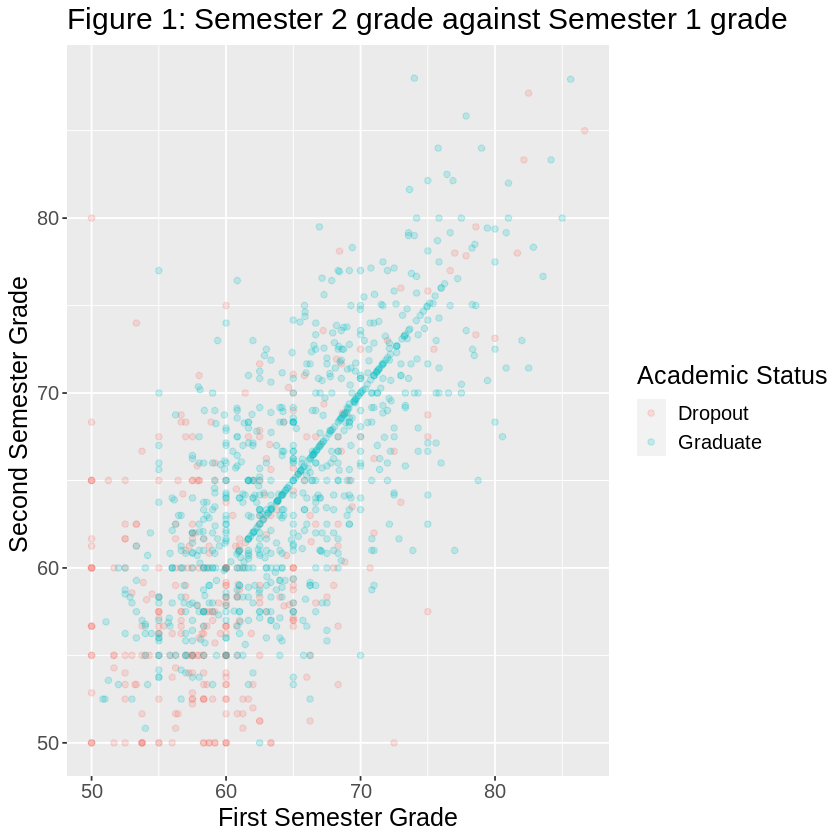

In [7]:
#Exploratory Visualization of the Predictors 
sem1sem2graph <- dropout_train |>
ggplot(aes(x=curricular_units_1st_sem_grade, y = curricular_units_2nd_sem_grade, color = target))+
geom_point(alpha = 0.2)+
xlab("First Semester Grade")+
ylab("Second Semester Grade ")+
labs(color = "Academic Status")+
ggtitle("Figure 1: Semester 2 grade against Semester 1 grade")+
theme(text = element_text (size = 15))
options(repr.plot.width = 7, repr.plot.height = 7)

sem1sem2graph

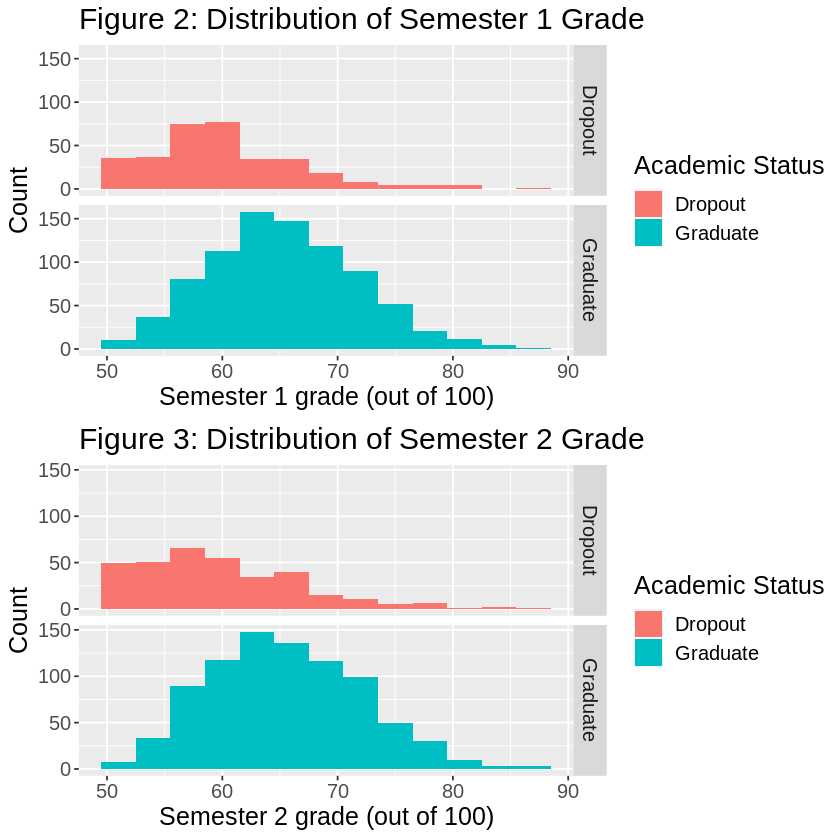

In [25]:
#Visualize the Distribution of the First and Second Semester Grades
sem1 <- dropout_train |>
ggplot(aes(x = curricular_units_1st_sem_grade, fill = target))+
geom_histogram(binwidth = 3, position= "dodge")+
xlab("Semester 1 grade (out of 100)")+
ylab("Count")+
labs(fill = "Academic Status")+
ggtitle("Figure 2: Distribution of Semester 1 Grade")+
theme(text = element_text (size = 15))+
facet_grid(row = "target")
options(repr.plot.width = 7, repr.plot.height = 7)

sem2 <- dropout_train |>
ggplot(aes(x = curricular_units_2nd_sem_grade, fill = target))+
geom_histogram(binwidth = 3, position= "dodge")+
xlab("Semester 2 grade (out of 100)")+
ylab("Count")+
labs(fill = "Academic Status")+
ggtitle("Figure 3: Distribution of Semester 2 Grade") +
theme(text = element_text (size = 15)) +
facet_grid(row = "target")
options(repr.plot.width = 7, repr.plot.height = 7)

plot_grid(sem1, sem2, ncol = 1)

In [26]:
#Exploratory Data analysis 1
#Number of training data instances
numrows <- nrow(dropout_train)
print("The Number of Observations in the Training set")
numrows


[1] "The Number of Observations in the Training set"


[1] 1179

In [27]:
#Exploratory Data analysis 2
#Proportion of the each of the Class variable
dropout_proportions <- dropout_train |>
                      group_by(target) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(dropout_train))

print("Table 5.1 Proportion of Class Variable")
dropout_proportions

ratio <- 336/843
print("Ratio of Dropout and Graduate in Training Set")
ratio

#The 1 to 2 ratio tells us that we need to balance the data

[1] "Table 5.1 Proportion of Class Variable"


target,n,percent
<fct>,<int>,<dbl>
Dropout,336,28.49873
Graduate,843,71.50127


[1] "Ratio of Dropout and Graduate in Training Set"


[1] 0.3985765

In [12]:
#Exploratory Data analysis 3
#Average grade of semester 1 and semester 2 for each class label

averageofeachclass <- dropout_train |>
group_by(target)|>
summarize(Sem1average = mean(curricular_units_1st_sem_grade), Sem2average = mean(curricular_units_2nd_sem_grade))

print("Table 5.2 Average of Semester 1 and 2")
averageofeachclass

[1] "Table 5.2 Average of Semester 1 and 2"


target,Sem1average,Sem2average
<fct>,<dbl>,<dbl>
Dropout,60.26129,59.92030
Graduate,65.34246,65.53426


### 6. Data Analysis and Visualization ###

In [16]:
#Finding the ideal K
set.seed(7)

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Create recipe and balance the observations so that it is 1 to 1
dropout_recipe <- recipe(target ~ curricular_units_2nd_sem_grade + curricular_units_1st_sem_grade, 
                        data = dropout_train) |>
step_upsample(target, over_ratio = 1, skip = TRUE)|>
step_scale(all_predictors()) |>
step_center(all_predictors())

# Create the 5 fold cross-validation
dropout_vfold <- vfold_cv(dropout_train, v = 5, strata = target)

#Checking if the step_upsample function is working properly
dropout_recipe_preped <- recipe(target ~ curricular_units_2nd_sem_grade + curricular_units_1st_sem_grade, 
                        data = dropout_train) |>
step_upsample(target, over_ratio = 1, skip = FALSE)|>
  step_scale(all_predictors()) |>
  step_center(all_predictors())|>
    prep()


balanced_dropout <- bake(dropout_recipe_preped, dropout_train)

print("Table 5.2 Test for the balancing")
balanced_dropout |>
  group_by(target) |>
  summarize(n = n())

[1] "Table 5.2 Test for the balancing"


target,n
<fct>,<int>
Dropout,843
Graduate,843


In [18]:
set.seed(7)
#Testing K values from 1 to 100 by 5
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

# Collect the result from the cross-validation
knn_results <- workflow() |>
  add_recipe(dropout_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = dropout_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

print("Table 5.3 Accuracy Estimate for Different K values")
accuracies

[1] "Table 5.3 Accuracy Estimate for Different K values"


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7149496,5,0.010975318,Preprocessor1_Model01
6,accuracy,binary,0.6835933,5,0.012267472,Preprocessor1_Model02
11,accuracy,binary,0.6827745,5,0.003261872,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.7217256,5,0.01571709,Preprocessor1_Model18
91,accuracy,binary,0.7217328,5,0.01196086,Preprocessor1_Model19
96,accuracy,binary,0.7251263,5,0.01303098,Preprocessor1_Model20


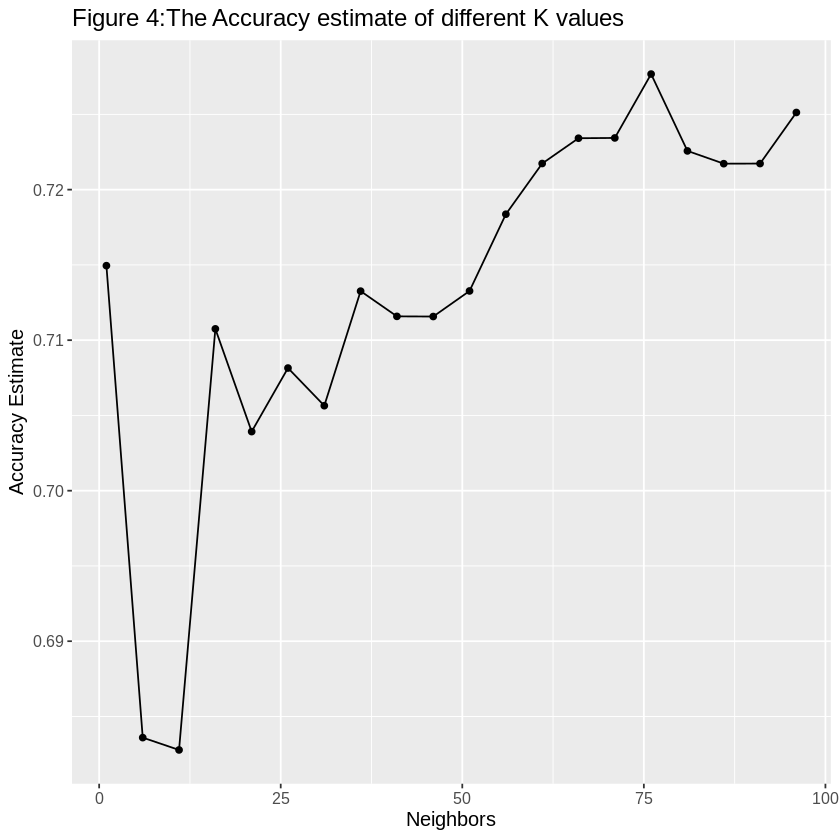

In [21]:
#Visualize the accuracies estimate of different k values
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  ggtitle("Figure 4:The Accuracy estimate of different K values")+
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
options(repr.plot.width = 7, repr.plot.height = 7)

accuracy_vs_k

In [19]:
#Finding the K with the highest accuracy
best_k <- accuracies|>
arrange(desc(mean))|>
slice(1)

print("K Value with the Highest Accuracy")
best_k

[1] "K Value with the Highest Accuracy"


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
76,accuracy,binary,0.7276794,5,0.01575777,Preprocessor1_Model16


In [20]:
#Setting k to the value with the highest accuracy (76)
set.seed(7)
knn_spec_best <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 76) |>
  set_engine("kknn") |>
  set_mode("classification")

dropout_recipe <- recipe(target ~ curricular_units_2nd_sem_grade + curricular_units_1st_sem_grade, 
                        data = dropout_train) |>
step_upsample(target, over_ratio = 1, skip = TRUE)|>
step_scale(all_predictors()) |>
step_center(all_predictors())

# Creating the Model based on the highest accuracy K value
knn_fit <- workflow() |>
  add_recipe(dropout_recipe) |>
  add_model(knn_spec_best) |>
  fit(data = dropout_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_upsample()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(76,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2876631
Best kernel: rectangular
Best k: 76

In [22]:
set.seed(7)

#Predicting the Testing set of the data using the model
dropout_test_predictions <- predict(knn_fit, dropout_test) |>
  bind_cols(dropout_test)

print("Table 5.4 Predicted Results added to the Testing set Data")
dropout_test_predictions

[1] "Table 5.4 Predicted Results added to the Testing set Data"


.pred_class,curricular_units_1st_sem_grade,curricular_units_2nd_sem_grade,target
<fct>,<dbl>,<dbl>,<fct>
Graduate,70.00000,68.33333,Graduate
Graduate,66.48333,70.57143,Graduate
Dropout,56.87500,66.42857,Graduate
⋮,⋮,⋮,⋮
Dropout,59.00000,58,Graduate
Dropout,60.00000,55,Dropout
Dropout,58.33333,65,Graduate


In [23]:
#accuracy of our model based on the testing set

print("Accuracy of the Model based on Testing Set")
dropout_test_predictions |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy")

[1] "Accuracy of the Model based on Testing Set"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.721519


In [24]:
#testing model based on new observations
set.seed(7)

print("Predicted Results for Two of our Group Members")
new_obs <- tibble(curricular_units_1st_sem_grade = 83, curricular_units_2nd_sem_grade = 62)
predict(knn_fit, new_obs)

new_obs2 <- tibble(curricular_units_1st_sem_grade = 89, curricular_units_2nd_sem_grade = 50)
predict(knn_fit, new_obs2)

[1] "Predicted Results for Two of our Group Members"


.pred_class
<fct>
Graduate


.pred_class
<fct>
Graduate


## Discussion:

#### FINDINGS:

Based on our graph, we found a that students who obtained higher grades across both semesters were likely to be graduates, whereas those who obtained lower grades were likely to dropout. This was the expected result, given the influence of academic performance on academic status. However, it is also worth noting that some dropouts achieved grades at the same level, or higher, than some graduates. This implies that there are other possible factors affecting whether a student drops out or graduates.

#### IMPACT:

Our findings contribute to educational institutions, specifically data on factors that can cause a student to drop-out. With these findings, institutions could provide early intervention and effectively allocate resources that could result in more stable learning environments and support students with low academic performance, who are at risk of dropping out. Additionally, this data can help institutions look into underlying issues, change teaching methods, and reach out to students who may be at a risk of dropping out.

#### FUTURE QUESTIONS:

Given the limitation of our scope, these findings point towards questions regarding other factors affecting dropout rates, such as:

Are there individual characteristics at play when it comes to academic performance?
Are there socioeconomic and cultural factors that affect students' likelihood of dropping out?
Are there factors intertwined with poor academic performance that could mediate the likelihood of dropping out?

## References:

Dinh-Thanh, N., Thi-Ngoc-Diem, P. (2023). Predicting Academic Performance of High School Students. In: Phan, C.V., Nguyen, T.D. (eds) Nature of Computation and Communication. ICTCC 2022. Lecture Notes of the Institute for Computer Sciences, Social Informatics and Telecommunications Engineering, vol 473. Springer, Cham. https://doi.org/10.1007/978-3-031-28790-9_8


Martins, M.V., Tolledo, D., Machado, J., Baptista, L.M.T., Realinho, V. (2021). Early Prediction of student’s Performance in Higher Education: A Case Study. In: Rocha, Á., Adeli, H., Dzemyda, G., Moreira, F., Ramalho Correia, A.M. (eds) Trends and Applications in Information Systems and Technologies. WorldCIST 2021. Advances in Intelligent Systems and Computing, vol 1365. Springer, Cham. https://doi.org/10.1007/978-3-030-72657-7_16


Realinho, V., Vieira Martins, M., Machado, J., and Baptista, L. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

Original Data Source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success